In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

1. Эксперимент №0

Проведем нулевой упрощенный эксперимент. Рассмотрим две страны в одной из которых 100% образовательного бюджета будет выделяться на техническое образование, а в другой - на культурное. В данном эксперименте не будем учитывать рождаемость и смертность. 

In [31]:
df0 = pd.read_csv('experiment_0.txt', names=['num', 'country', 'age', 'i'])
age_map = {0: 'newborn', 1: 'young', 2: 'adult', 3: 'old'}
df0['age'] = df0['age'].apply(lambda x: age_map[x])
df0['country'] = df0['country'].astype('str')

In [32]:
fig = px.bar(df0.groupby(['country', 'i'], as_index=False).sum(), x='i', y='num', color='country')
fig.show()

In [33]:
df0_g = df0.groupby(['country', 'i'], as_index=False).sum()
df_c1= df0_g[df0_g['country'] == '0']
df_c2 = df0_g[df0_g['country'] == '1']
df_c2

,country,i,num,age
9,1,0,1000000,newbornyoungadultold
10,1,1,1150000,newbornyoungadultold
11,1,2,1211000,newbornyoungadultold
12,1,3,1269400,newbornyoungadultold
13,1,4,1321400,newbornyoungadultold
14,1,5,1367824,newbornyoungadultold
15,1,6,1411045,newbornyoungadultold
16,1,7,1453437,newbornyoungadultold
17,1,8,1496782,newbornyoungadultold


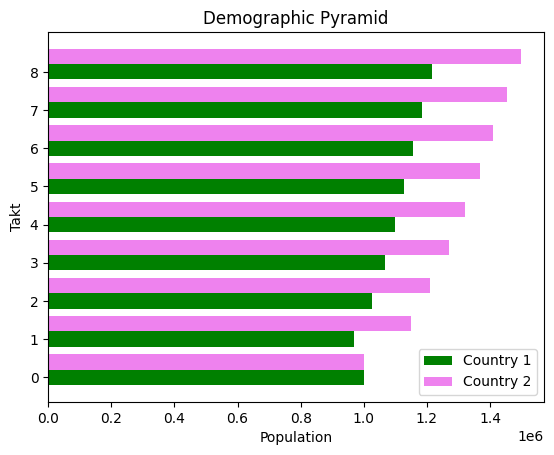

In [34]:
takts = df0_g['i'].unique()
c1_population = df_c1['num'].values  
c2_population = df_c2['num'].values
fig, ax = plt.subplots()

bar_width = 0.4
bar_positions_c1 = range(len(takts))
bar_positions_c2 = [x + bar_width for x in bar_positions_c1]

ax.barh(bar_positions_c1, c1_population, height=bar_width, color='green', label='Country 1')
ax.barh(bar_positions_c2, c2_population, height=bar_width, color='violet', label='Country 2')

ax.set_yticks(range(len(takts)))
ax.set_yticklabels(takts)
ax.set_xlabel('Population')
ax.set_ylabel('Takt')
ax.set_title('Demographic Pyramid')

ax.legend()

plt.show()

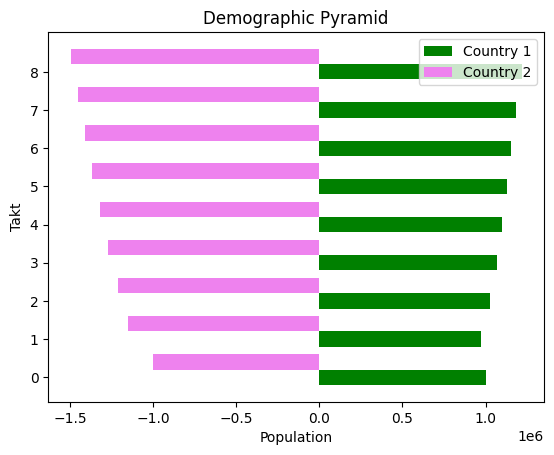

In [35]:
fig, ax = plt.subplots()

bar_width = 0.4
bar_positions_c1 = range(len(takts))
bar_positions_c2 = [x + bar_width for x in bar_positions_c1]

ax.barh(bar_positions_c1, c1_population, height=bar_width, color='green', label='Country 1')
ax.barh(bar_positions_c2, -c2_population, height=bar_width, color='violet', label='Country 2')  # Отрицательные значения для Country 2

ax.set_yticks(range(len(takts)))
ax.set_yticklabels(takts)
ax.set_xlabel('Population')
ax.set_ylabel('Takt')
ax.set_title('Demographic Pyramid')

ax.legend()
plt.show()

__2. Эксперимент №1__

In [27]:
df1 = pd.read_csv('experiment_1.txt', names=['num', 'country', 'age', 'i'])
age_map = {0: 'newborn', 1: 'young', 2: 'adult', 3: 'old'}
df1['age'] = df1['age'].apply(lambda x: age_map[x])
df1['country'] = df1['country'].astype('str')

In [36]:
fig = px.bar(df1.groupby(['country', 'i'], as_index=False).sum(), x='i', y='num', color='country')
fig.show()

In [47]:
df1_g = df1.groupby(['country', 'i'], as_index=False).sum()
df1_c1= df1_g[df1_g['country'] == '0.2']
df1_c2 = df1_g[df1_g['country'] == '0.5']
df1_c3 = df1_g[df1_g['country'] == '0.7']

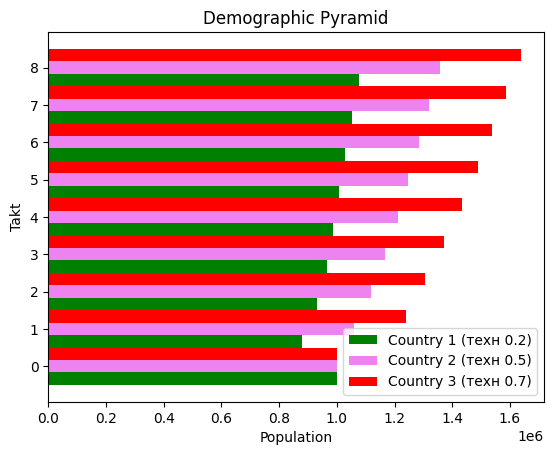

In [54]:
takts = df1_g['i'].unique()
c11_population = df1_c1['num'].values
c21_population = df1_c2['num'].values
c31_population = df1_c3['num'].values
fig, ax = plt.subplots()

bar_width = 0.3333
bar_positions_c11 = np.arange(len(takts))
bar_positions_c21 = bar_positions_c11 + bar_width 
bar_positions_c31 = bar_positions_c11 + bar_width * 2 

ax.barh(bar_positions_c11, c11_population, height=bar_width, color='green', label='Country 1 (техн 0.2)')
ax.barh(bar_positions_c21, c21_population, height=bar_width, color='violet', label='Country 2 (техн 0.5)')
ax.barh(bar_positions_c31, c31_population, height=bar_width, color='red', label='Country 3 (техн 0.7)')

ax.set_yticks(bar_positions_c11 + bar_width) 
ax.set_yticklabels(takts)
ax.set_xlabel('Population')
ax.set_ylabel('Takt')
ax.set_title('Demographic Pyramid')

ax.legend()

plt.show()

In [55]:
fig = px.bar(df1.groupby(['age', 'i'], as_index=False).sum(), x='i', y='num', color='age')
fig.show()

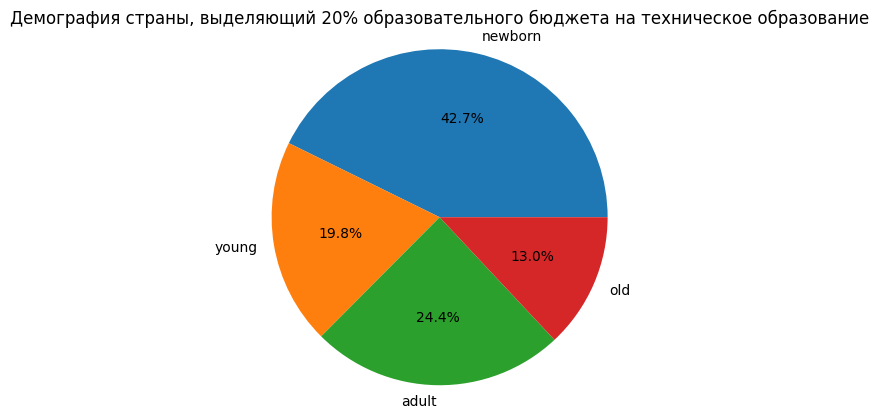

In [72]:
df1_02 = df1[(df1['country'] == '0.2') & (df1['i'] == 8)]
plt.pie(df1_02['num'].values, labels=list(age_map.values()), autopct='%1.1f%%')
plt.axis('equal')
plt.title("Демография страны, выделяющий 20% образовательного бюджета на техническое образование")
plt.show()

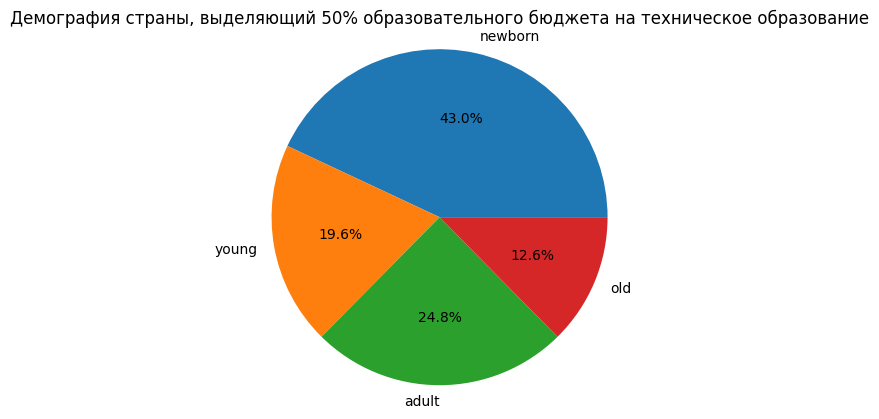

In [74]:
df1_05 = df1[(df1['country'] == '0.5') & (df1['i'] == 8)]
plt.pie(df1_05['num'].values, labels=list(age_map.values()), autopct='%1.1f%%')
plt.axis('equal')
plt.title("Демография страны, выделяющий 50% образовательного бюджета на техническое образование")
plt.show()

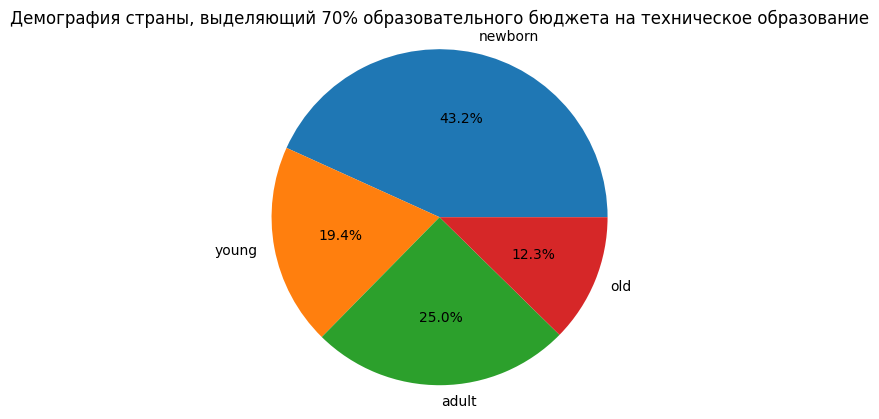

In [75]:
df1_07 = df1[(df1['country'] == '0.7') & (df1['i'] == 8)]
plt.pie(df1_07['num'].values, labels=list(age_map.values()), autopct='%1.1f%%')
plt.axis('equal')
plt.title("Демография страны, выделяющий 70% образовательного бюджета на техническое образование")
plt.show()